In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import OrderedDict, Counter
from snmachine import sndata
import pandas as pd
import json
import glob
%matplotlib nbagg
%load_ext autoreload

plt.rcParams['nbagg.transparent'] = False
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
lcs = glob.glob('/home/michelle/BigData/SN_Sims/SDSS_SESNe_5/lcs/*')
logs = glob.glob('/home/michelle/BigData/SN_Sims/SDSS_SESNe_5/logs/*')

In [3]:
#filts = ['SDSS_u','SDSS_g','SDSS_r','SDSS_i','SDSS_z']
filts = ['SDSS_g','SDSS_r','SDSS_i','SDSS_z'] # There's no u band anywhere

out = []

for l in lcs:
    name = l.split('/')[-1].split('.')[0]
    dat = pd.read_csv(l, delim_whitespace=True)
    
    this_row = []
    for filt in filts:
        flx = dat[dat['filter']==filt]['flux']
        mag = 28-2.5*np.log10(flx.max())
        this_row.append(mag)
    
#     peak.append(flx.max())
    lg = json.load(open('/home/michelle/BigData/SN_Sims/SDSS_SESNe_5/logs/LOG_'+name+'.json'))
#     z.append(lg['z_sim'])
#     types.append(lg['subtype'])
    this_row.append(lg['z_sim'])
    this_row.append(lg['subtype'])
    out.append(this_row)
out = pd.DataFrame(data=out, columns=filts+['redshift','type'])

/home/michelle/anaconda2/envs/snmachine/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


In [5]:
print('Number of sources with missing bands:')
for f in filts:
    print(f, sum(np.isinf(out[f])), len(out))

Number of sources with missing bands:
SDSS_g 8255 10000
SDSS_r 266 10000
SDSS_i 59 10000
SDSS_z 327 10000


In [6]:
print('Number of each type:')
print(Counter(out.type))
print()
print('Number of each type where g-band is zero:')
print(Counter(out[~np.isinf(out.SDSS_g)].type))

Number of each type:
Counter({u'Ic': 6975, u'Ib': 2589, u'IIb': 436})

Number of each type where g-band is zero:
Counter({u'Ic': 787, u'Ib': 634, u'IIb': 324})


<IPython.core.display.Javascript object>


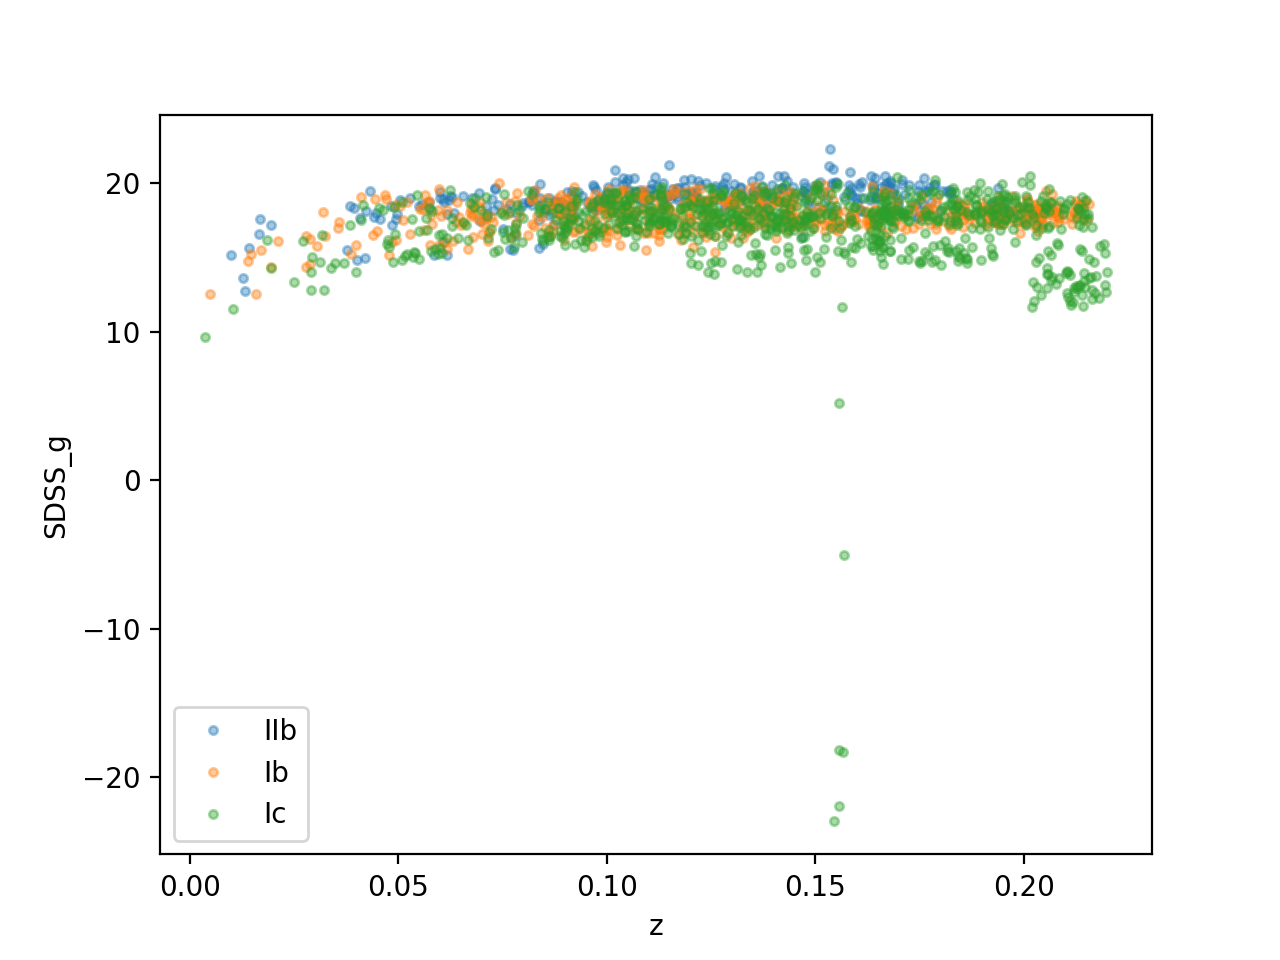

<IPython.core.display.Javascript object>


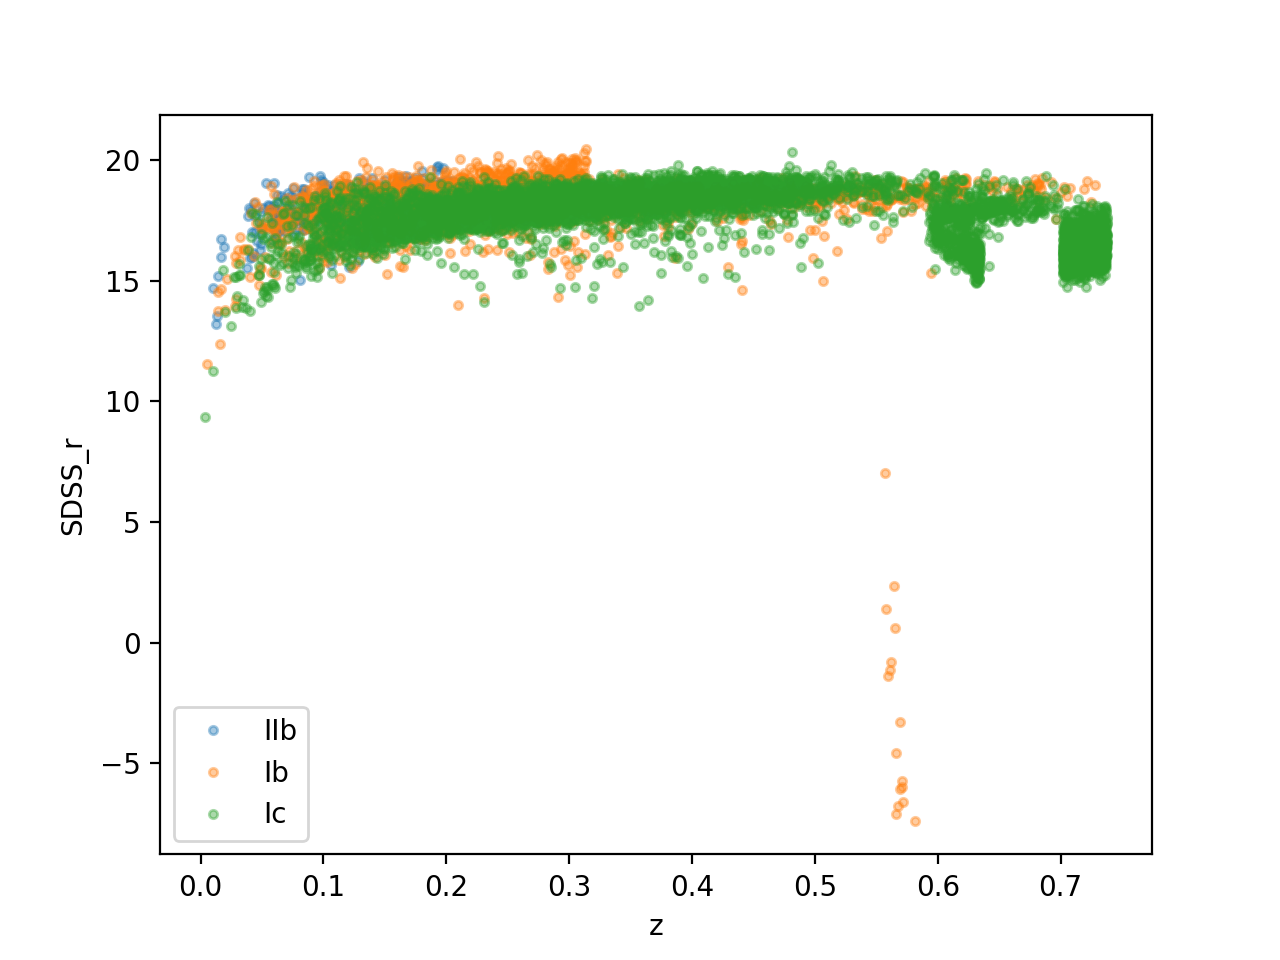

<IPython.core.display.Javascript object>


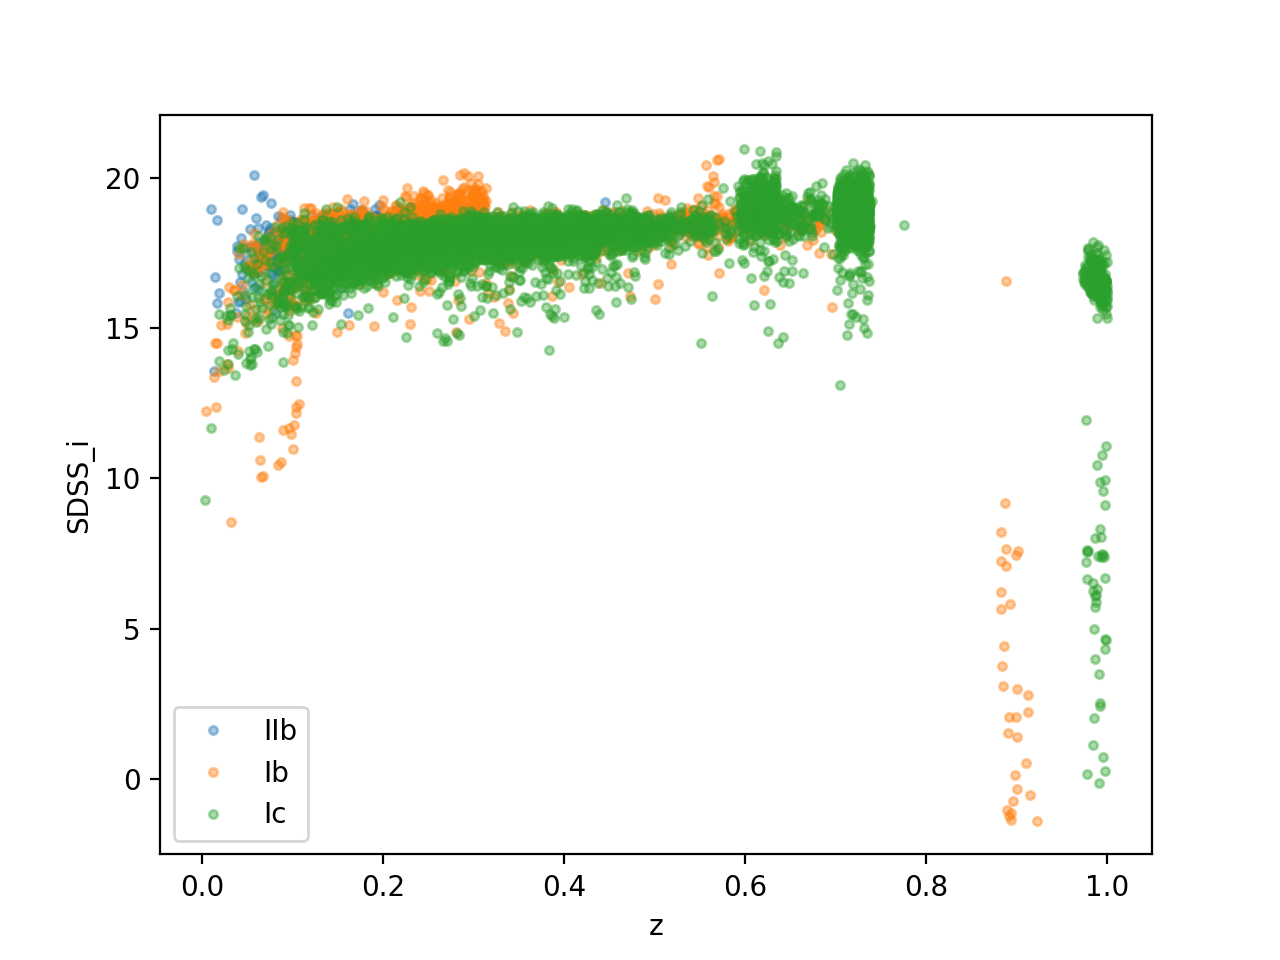

<IPython.core.display.Javascript object>


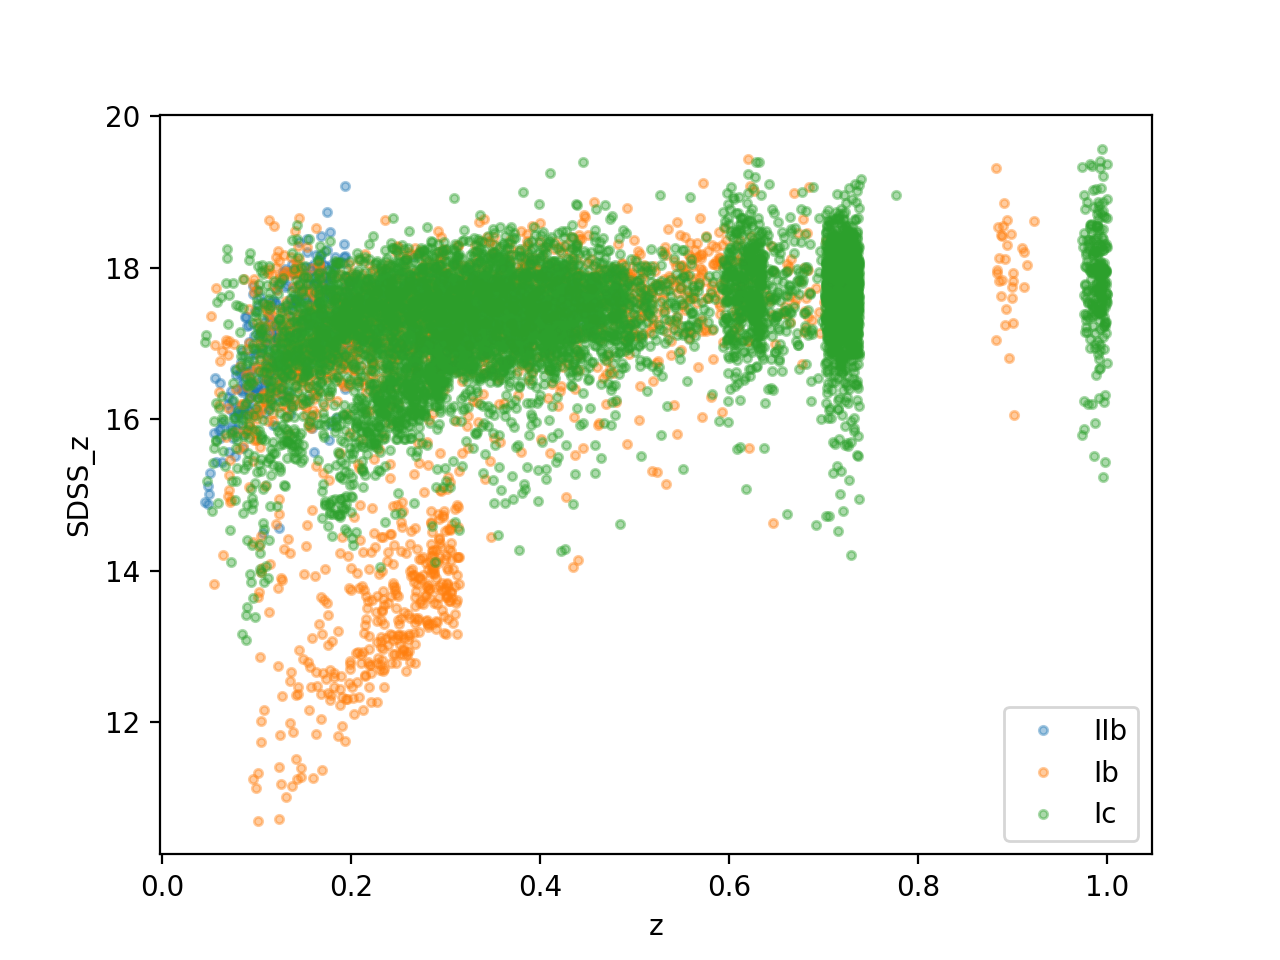

In [40]:
types = np.unique(out.type)
for filt in filts:
    plt.figure()
    for typ in types:
        plt.plot(out[out.type==typ].redshift, out[out.type==typ][filt], '.', alpha=0.4)
    plt.xlabel('z')
    plt.ylabel(filt)
    plt.legend(types)
    plt.savefig('../figures/%s.png' %filt)